In [1]:
import numpy as np
import pandas as pd
from Bio import SeqIO
import matplotlib.pyplot as plt
from hw3 import io
from hw3 import smith_waterman
from hw3 import optimize
from sklearn import metrics
import random
import copy

In [2]:
def byFirst(elem):
    return elem[0]

In [3]:
####readin
true_pos = io.import_pairs('data/Pospairs.txt')
true_neg = io.import_pairs('data/Negpairs.txt')
all_pairs = [true_pos,true_neg]
#####import blosum matrix
blosums = []
blosum_files = ['PAM100']
for file in blosum_files:
    importme = 'blosums/'+file
    scoring_matrix = io.import_blosum(importme)
###################
####initialize
total_confusions = []
pen_gap_extend = -5
pen_gap_open = -6
plt.figure(figsize=(10,10))
#####################
#####loop through scoring matrices and calculate confusion for each one
#####################
matrix_num = 0
line_widths = [5,2]
####
total_scores = []
########do alignments for all pairs
for file in all_pairs:
    for pair in file:
        ###this contains just the scores
        output = smith_waterman.smith_waterman(pair[0],pair[1],scoring_matrix,pen_gap_open,pen_gap_extend)
        total_scores.append([output[2],pair])
        

KeyboardInterrupt: 

In [14]:
def calc_ROC(true_pos, total_scores):
    ####init 
    TPR = []
    FPR = []
    AUC = []
    stepsize = float(1)/float(len(true_neg))
    AUC_counter = 0.0
    #####
    for FP_limit in range(len(true_neg)+1):
        TP = 0.0
        FP = 0.0
        P = float(len(true_pos))
        N = float(len(true_neg))
        ####sort biggest to smallest
        total_scores.sort(key=byFirst,reverse=True)
        ####scroll through and count TPs and FPs
        if FP_limit == 0:
            for alignment in total_scores:
                if alignment[1] in true_pos:
                    TP += 1
                else:
                    break
        else:
            for alignment in total_scores:
                if FP >= FP_limit:
                    break
                if alignment[1] in true_pos:
                    TP += 1
                else:
                    FP += 1
        ####save the FPR, TPR, AUC
        TPR.append(TP/P)
        FPR.append(FP/N)
        AUC_counter += float(stepsize) * float(TP/P)
        AUC.append(AUC_counter)
        ####
    return(FPR,TPR,AUC)


In [50]:
def plot_ROCs(true_pos,scores_array,legend_array):
    ####
    i = 0
    plt.figure(figsize=(10,10))
    plt.plot([0, 1], [0, 1],'r--')
    ####
    for scores in scores_array:
        FPR, TPR, AUC = calc_ROC(true_pos,scores)
        #####
        printme = legend_array[i] + ' AUC: ' + str(AUC[-1])
        #####
        plt.plot(FPR,TPR,label=printme)
        ##
        i+=1
    ####
    plt.legend(loc=0)
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    
def plot_ROC(true_pos,scores,legend):
    FPR, TPR, AUC = calc_ROC(true_pos,scores)
    #####
    printme = legend + ' AUC: ' + str(AUC[-1])
    #####
    plt.figure(figsize=(10,10))
    plt.plot(FPR,TPR,label=printme)
    plt.plot([0, 1], [0, 1],'r--')
    plt.legend(loc=0)
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

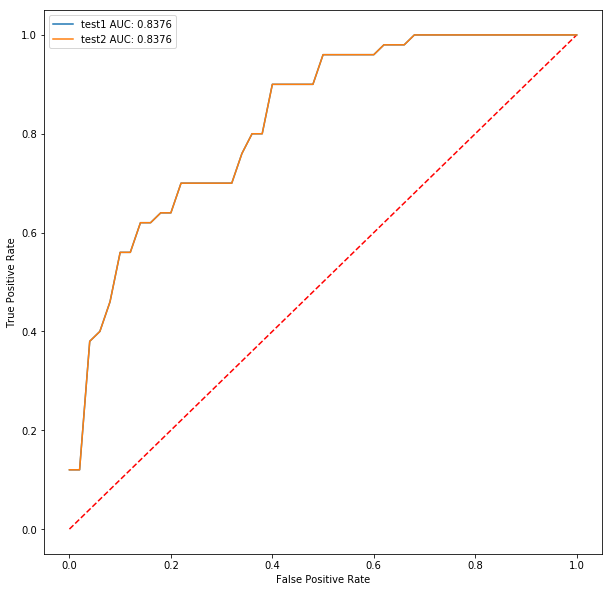

In [51]:
tests = []
tests.append(total_scores)
tests.append(total_scores)
#####
legends = []
legends.append('test1')
legends.append('test2')
######
plot_ROCs(true_pos,tests,legends)

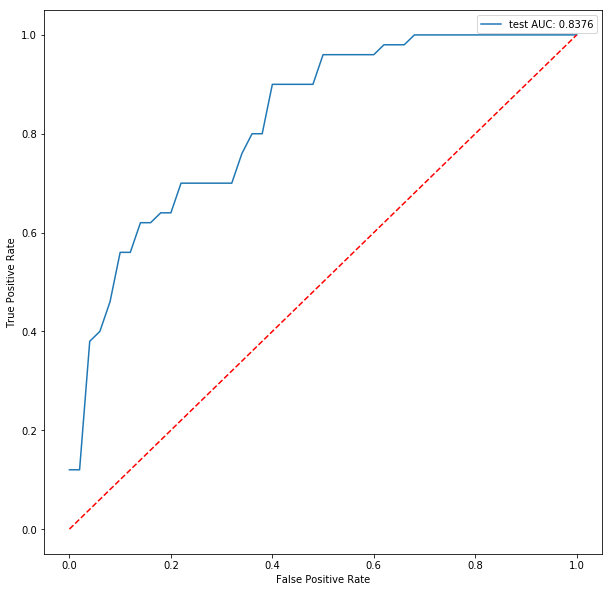

In [46]:
plot_ROC(true_pos,total_scores,"test")
plt.show()


In [ ]:
 ####initialize
#     FPR = float((i+1))/100
#     FP = 0
#     TP = 0
#     TPR = 0.0
#     actual_FPR = -1
#     predicted_pos = []
#     predicted_neg = []
#     found_all_positives = False
#     ####sort biggest to smallest
#     total_scores.sort(key=byFirst,reverse=True)
#     for alignment in total_scores:
#         tmp_rate = 0
#         if found_all_positives == False:
#             if alignment[1] not in true_pos: 
#                 #####evaluate new FPR
#                 new_FPR = float(FP+1)/float(len(true_neg))
#                 #####evaluate if this will exceed FPR threshold
#                 ###this is used to handle small or 0 values of FPR
#                 if new_FPR >= FPR:
#                     found_all_positives = True
#                     if FPR == 0:
#                         predicted_neg.append(alignment)
#                     else:
#                         predicted_pos.append(alignment)
#                 else:
#                     FP += 1
#                     actual_FPR = float(FP)/float(len(true_neg))
#                     predicted_pos.append(alignment)
#             else:
#                 TP += 1
#                 TPR = float(TP)/float(len(true_pos))
#                 predicted_pos.append(alignment)
#             if actual_FPR == FPR:
#                 found_all_positives = True
#         else:
#             predicted_neg.append(alignment) 
#     print(FPR,TPR)
#     break


In [ ]:
test = 0
for item in predicted_pos:
    if item[1] not in true_pos:
        test += 1
test

In [ ]:
len(predicted_pos)

In [ ]:
###sort, largest to smallest
total_scores.sort(key=byFirst,reverse=True)
####loop through and count TPR until matches TPR = 0.7
FPR = 0.3
FP = 0
TP = 0
TPR = 0.0
actual_FPR = -1
predicted_pos = []
predicted_neg = []
found_all_positives = False
for alignment in total_scores:
    tmp_rate = 0
    if found_all_positives == False:
        if alignment[1] not in true_pos: 
            #####evaluate new FPR
            new_FPR = float(FP+1)/float(len(true_neg))
            #####evaluate if this will exceed FPR threshold
            ###this is used to handle small or 0 values of FPR
            if new_FPR >= FPR:
                found_all_positives = True
                if FPR == 0:
                    predicted_neg.append(alignment)
                else:
                    predicted_pos.append(alignment)
            else:
                FP += 1
                actual_FPR = float(FP)/float(len(true_neg))
                predicted_pos.append(alignment)
        else:
            TP += 1
            TPR = float(TP)/float(len(true_pos))
            predicted_pos.append(alignment)
        if actual_FPR == FPR:
            found_all_positives = True
    else:
        predicted_neg.append(alignment)  